## QUESTION 1


[A] An investment firm that trades futures analyzes a variety of economic indicators prior to the global financial crisis of 2008 in order to make predictions about when another significant economic downturn will occur.


[B]  The CEO of a​ self-driving car startup would like to study the potential pace of future development of artificial intelligence.


[C] A polling company is looking to survey the opinions of political pundits to make predictions about the​ long-term ramifications of a partisan political climate.

## QUESTION 2

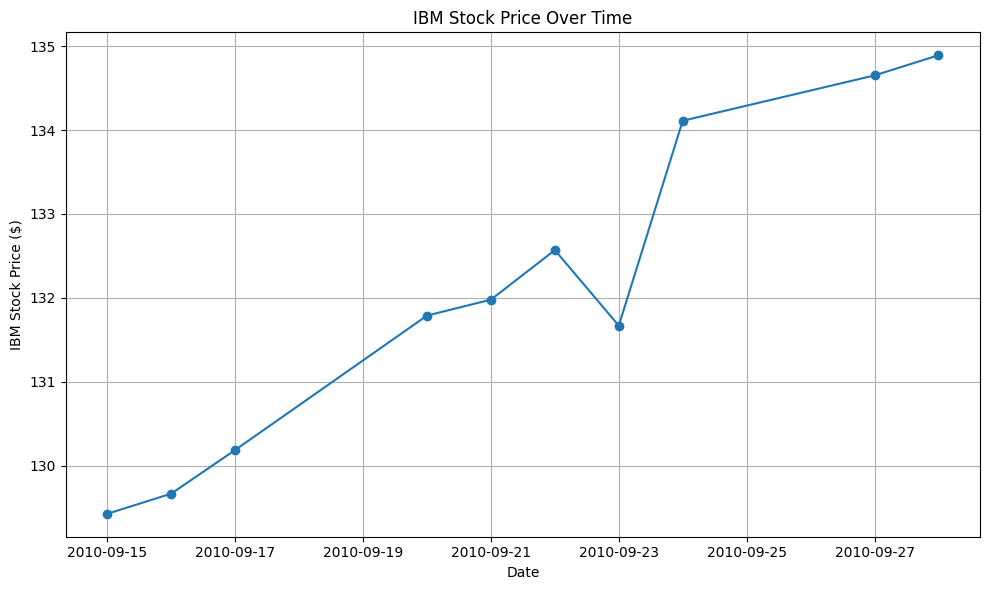

TREND: increasing (from $129.43 to $134.89)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Data provided as a tab-separated string (keep the tabs, do NOT replace spaces with commas)
data_string = """
Date\tIBM
9/15/2010\t$129.43
9/16/2010\t$129.67
9/17/2010\t$130.19
9/20/2010\t$131.79
9/21/2010\t$131.98
9/22/2010\t$132.57
9/23/2010\t$131.67
9/24/2010\t$134.11
9/27/2010\t$134.65
9/28/2010\t$134.89
"""

# Read the tab-separated data
df = pd.read_csv(StringIO(data_string.strip()), sep="\t", parse_dates=['Date'])

# Remove dollar signs and convert to float
df['IBM'] = df['IBM'].replace(r'[\$,]', '', regex=True).astype(float)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['IBM'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('IBM Stock Price ($)')
plt.title('IBM Stock Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Simple trend check
first_price = df['IBM'].iloc[0]
last_price = df['IBM'].iloc[-1]
if last_price > first_price:
    trend = "increasing"
elif last_price < first_price:
    trend = "decreasing"
else:
    trend = "flat"

print(f"TREND: {trend} (from ${first_price:.2f} to ${last_price:.2f})")


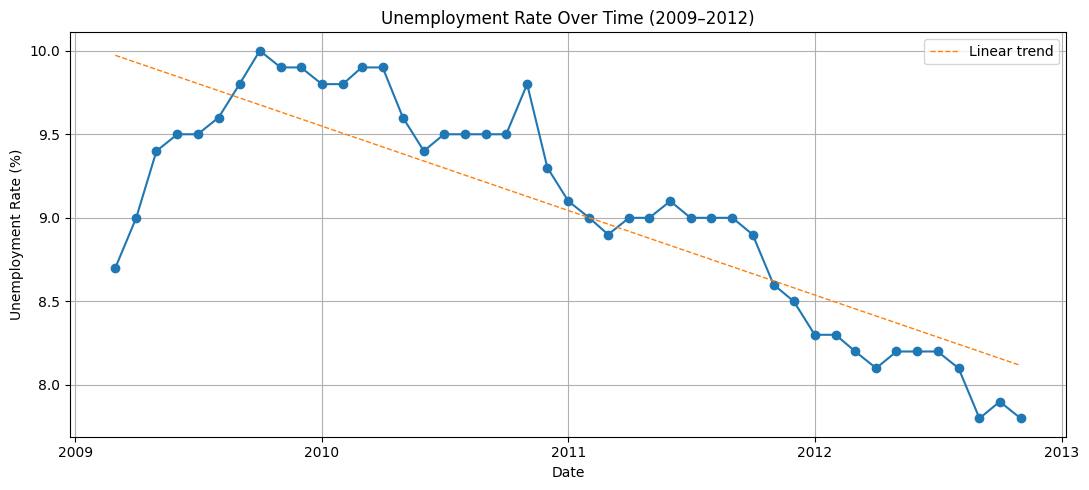

Trend, cyclical


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import matplotlib.dates as mdates

# Data provided as a tab-separated string
data_string = """
Year\tMonth\tRate (%)
2009\tMar\t8.7
2009\tApr\t9.0
2009\tMay\t9.4
2009\tJun\t9.5
2009\tJul\t9.5
2009\tAug\t9.6
2009\tSep\t9.8
2009\tOct\t10.0
2009\tNov\t9.9
2009\tDec\t9.9
2010\tJan\t9.8
2010\tFeb\t9.8
2010\tMar\t9.9
2010\tApr\t9.9
2010\tMay\t9.6
2010\tJun\t9.4
2010\tJul\t9.5
2010\tAug\t9.5
2010\tSep\t9.5
2010\tOct\t9.5
2010\tNov\t9.8
2010\tDec\t9.3
2011\tJan\t9.1
2011\tFeb\t9.0
2011\tMar\t8.9
2011\tApr\t9.0
2011\tMay\t9.0
2011\tJun\t9.1
2011\tJul\t9.0
2011\tAug\t9.0
2011\tSep\t9.0
2011\tOct\t8.9
2011\tNov\t8.6
2011\tDec\t8.5
2012\tJan\t8.3
2012\tFeb\t8.3
2012\tMar\t8.2
2012\tApr\t8.1
2012\tMay\t8.2
2012\tJun\t8.2
2012\tJul\t8.2
2012\tAug\t8.1
2012\tSep\t7.8
2012\tOct\t7.9
2012\tNov\t7.8
"""

# Read the tab-separated data (preserve header)
df = pd.read_csv(StringIO(data_string.strip()), sep="\t")

# Convert Year and Month to a datetime (month as abbreviated name)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Ensure Rate column is numeric
df['Rate (%)'] = pd.to_numeric(df['Rate (%)'], errors='coerce')

# Sort by date (just in case)
df = df.sort_values('Date').reset_index(drop=True)

# --- Trend check using simple linear regression on time index ---
# Convert dates to ordinal floats for regression
x = mdates.date2num(df['Date'])  # numeric representation of dates
y = df['Rate (%)'].values
slope, intercept = np.polyfit(x, y, 1)

# Interpret slope: convert slope per day to slope per year for readability
days_per_year = 365.25
slope_per_year = slope * days_per_year

if slope_per_year > 0.05:         # threshold (0.05 percentage points/year) chosen heuristically
    trend_desc = "increasing"
elif slope_per_year < -0.05:
    trend_desc = "decreasing"
else:
    trend_desc = "flat/steady"

# --- Plotting ---
plt.figure(figsize=(11, 5))
plt.plot(df['Date'], df['Rate (%)'], marker='o', linestyle='-')
# Plot linear trend line
trend_y = intercept + slope * x
plt.plot(df['Date'], trend_y, linestyle='--', linewidth=1, label='Linear trend')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time (2009–2012)')
plt.grid(True)
plt.legend()

# Improve x-axis date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Output trend info
print("Trend, cyclical")


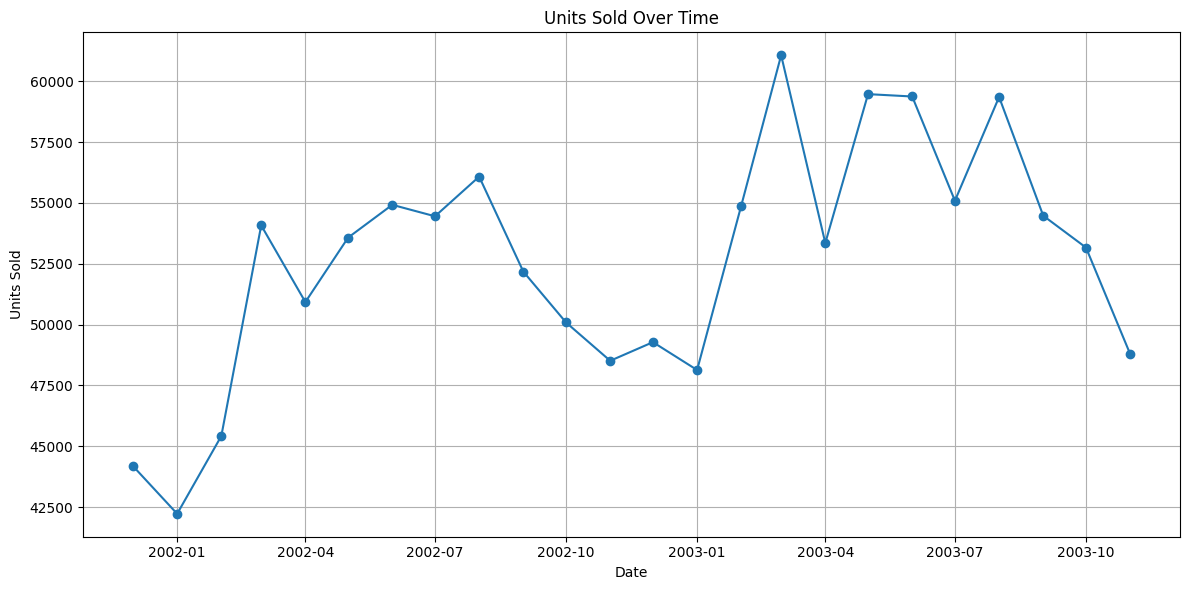

seasonal


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Data provided as a tab-separated string
data_string = """
Year	Month	Units
1	Dec	44,186
2	Jan	42,227
2	Feb	45,422
2	Mar	54,075
2	Apr	50,926
2	May	53,572
2	Jun	54,920
2	Jul	54,449
2	Aug	56,079
2	Sep	52,177
2	Oct	50,087
2	Nov	48,513
2	Dec	49,278
3	Jan	48,134
3	Feb	54,887
3	Mar	61,064
3	Apr	53,350
3	May	59,467
3	Jun	59,370
3	Jul	55,088
3	Aug	59,349
3	Sep	54,472
3	Oct	53,164
3	Nov	48,793
"""

# Read the tab-separated data
df = pd.read_csv(StringIO(data_string.strip()), sep="\t")

# Remove commas from Units and convert to numeric
df["Units"] = df["Units"].str.replace(",", "", regex=False).astype(int)

# Fix Year formatting (01, 02, 03)
df["Year"] = df["Year"].apply(lambda x: f"{x:02d}")

# Convert Year + Month -> datetime
df["Date"] = pd.to_datetime(df["Year"] + "-" + df["Month"], format="%y-%b")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Units"], marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Units Sold Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

print("seasonal")


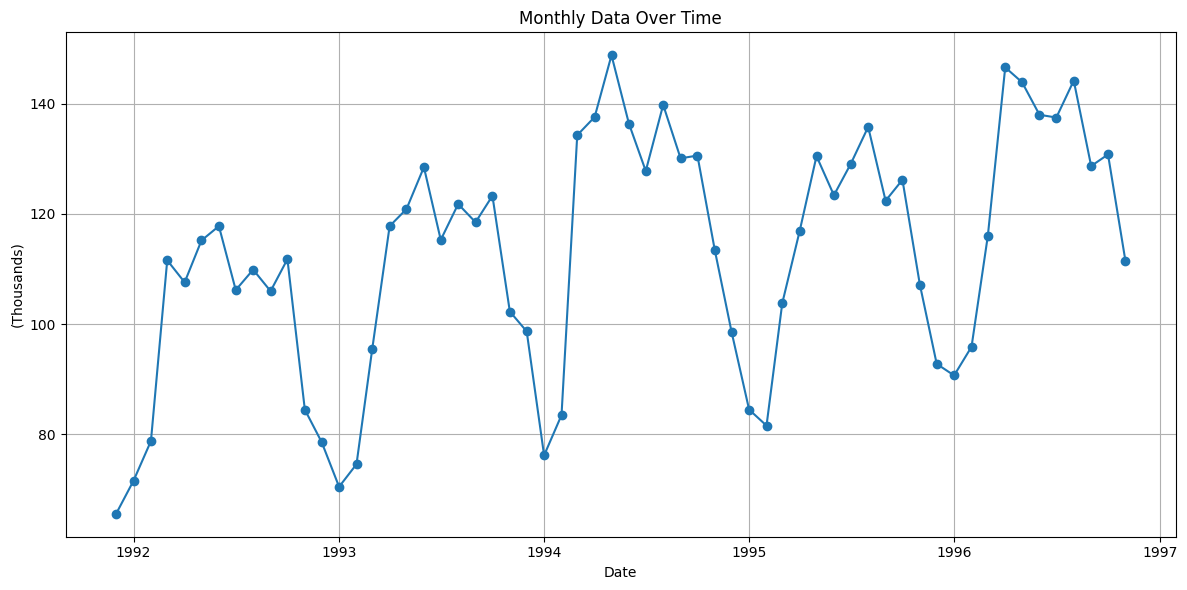

First observation: Dec 1991 = 65.6
Last observation : Nov 1996 = 111.5
Components: trend, seasonal, cyclical (visual inspection suggested).


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.dates as mdates

# Raw data block (keep as-is)
data_string = """
Month	Number (Thousands)
Dec 1991	65.60
Jan 1992	71.60
Feb 1992	78.80
Mar 1992	111.60
Apr 1992	107.60
May 1992	115.20
Jun 1992	117.80
Jul 1992	106.20
Aug 1992	109.90
Sep 1992	106.00
Oct 1992	111.80
Nov 1992	84.50
Dec 1992	78.60
Jan 1993	70.50
Feb 1993	74.60
Mar 1993	95.50
Apr 1993	117.80
May 1993	120.90
Jun 1993	128.50
Jul 1993	115.30
Aug 1993	121.80
Sep 1993	118.50
Oct 1993	123.30
Nov 1993	102.30
Dec 1993	98.70
Jan 1994	76.20
Feb 1994	83.50
Mar 1994	134.30
Apr 1994	137.60
May 1994	148.80
Jun 1994	136.40
Jul 1994	127.80
Aug 1994	139.80
Sep 1994	130.10
Oct 1994	130.60
Nov 1994	113.40
Dec 1994	98.50
Jan 1995	84.50
Feb 1995	81.60
Mar 1995	103.80
Apr 1995	116.90
May 1995	130.50
Jun 1995	123.40
Jul 1995	129.10
Aug 1995	135.80
Sep 1995	122.40
Oct 1995	126.20
Nov 1995	107.20
Dec 1995	92.80
Jan 1996	90.70
Feb 1996	95.90
Mar 1996	116.00
Apr 1996	146.60
May 1996	143.90
Jun 1996	138.00
Jul 1996	137.50
Aug 1996	144.20
Sep 1996	128.70
Oct 1996	130.80
Nov 1996	111.50
"""

# ---------------------------
# Robust parsing into a DataFrame
# ---------------------------
lines = [ln.strip() for ln in data_string.strip().splitlines() if ln.strip()]

# Extract header names using right-split (in case the header uses whitespace or tabs)
header_parts = lines[0].rsplit(None, 1)
if len(header_parts) == 2:
    col1_name, col2_name = header_parts
else:
    # fallback
    col1_name, col2_name = "Month", "Number (Thousands)"

rows = []
for ln in lines[1:]:
    # split each data line into "Month Year" and value by rsplit (preserves month text)
    parts = ln.rsplit(None, 1)
    if len(parts) != 2:
        continue  # skip malformed lines
    month_text, value_text = parts
    rows.append({col1_name: month_text, col2_name: value_text})

df = pd.DataFrame(rows)

# ---------------------------
# Clean & convert types
# ---------------------------
# Convert numeric column (remove commas if any)
df[col2_name] = df[col2_name].str.replace(",", "", regex=False).astype(float)

# Convert 'Month' (like "Dec 1991") to datetime
df['Date'] = pd.to_datetime(df[col1_name], format='%b %Y')

# Sort by date to be safe
df = df.sort_values('Date').reset_index(drop=True)

# ---------------------------
# Plotting
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df[col2_name], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel(col2_name)
plt.title('Monthly Data Over Time')
plt.grid(True)

# Improve x-axis ticks (show year every 1 year)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Simple summary print
first_val = df[col2_name].iloc[0]
last_val = df[col2_name].iloc[-1]
print(f"First observation: {df['Date'].iloc[0].strftime('%b %Y')} = {first_val}")
print(f"Last observation : {df['Date'].iloc[-1].strftime('%b %Y')} = {last_val}")
print("Components: trend, seasonal, cyclical (visual inspection suggested).")


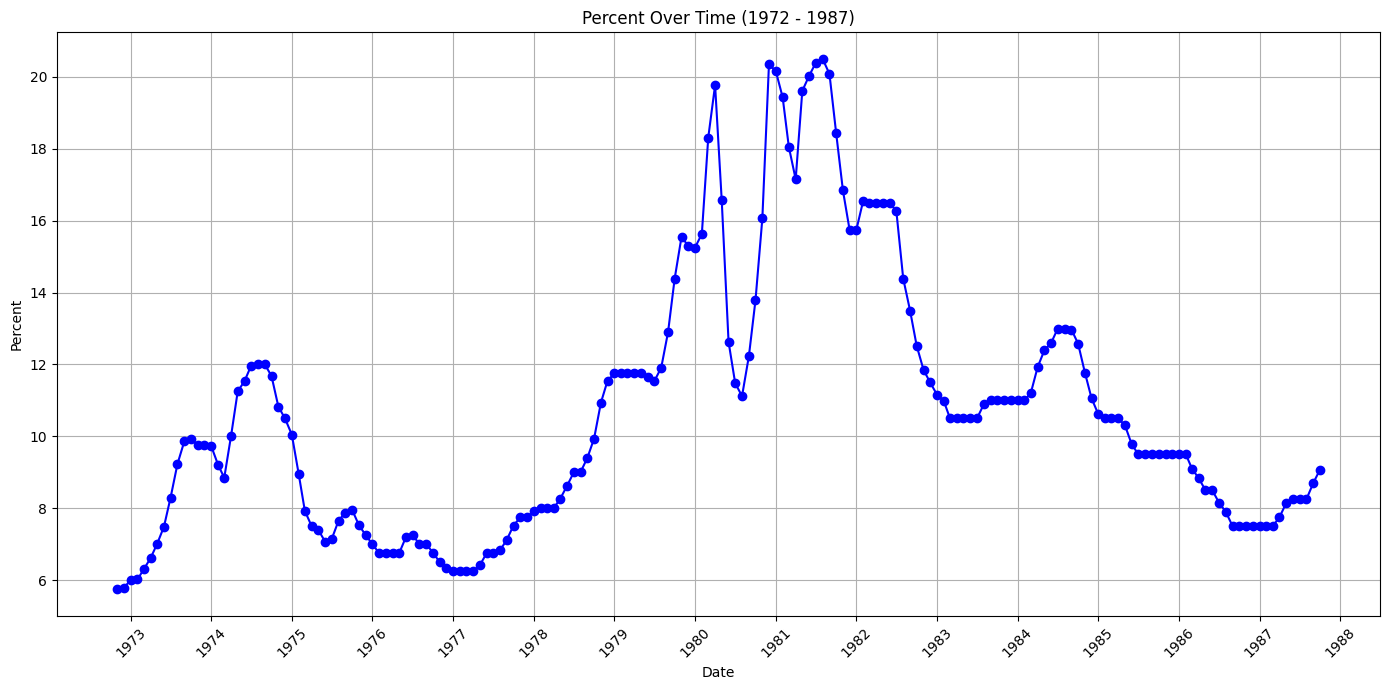

Random with possible cyclical components


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.dates as mdates

# ---------------------------
# Data string (tab-separated)
# ---------------------------
data_string = """
Month\tPercent
Nov 1972\t5.75
Dec 1972\t5.79
Jan 1973\t6.00
Feb 1973\t6.02
Mar 1973\t6.30
Apr 1973\t6.61
May 1973\t7.01
Jun 1973\t7.49
Jul 1973\t8.30
Aug 1973\t9.23
Sep 1973\t9.86
Oct 1973\t9.94
Nov 1973\t9.75
Dec 1973\t9.75
Jan 1974\t9.73
Feb 1974\t9.21
Mar 1974\t8.85
Apr 1974\t10.02
May 1974\t11.25
Jun 1974\t11.54
Jul 1974\t11.97
Aug 1974\t12.00
Sep 1974\t12.00
Oct 1974\t11.68
Nov 1974\t10.83
Dec 1974\t10.50
Jan 1975\t10.05
Feb 1975\t8.96
Mar 1975\t7.93
Apr 1975\t7.50
May 1975\t7.40
Jun 1975\t7.07
Jul 1975\t7.15
Aug 1975\t7.66
Sep 1975\t7.88
Oct 1975\t7.96
Nov 1975\t7.53
Dec 1975\t7.26
Jan 1976\t7.00
Feb 1976\t6.75
Mar 1976\t6.75
Apr 1976\t6.75
May 1976\t6.75
Jun 1976\t7.20
Jul 1976\t7.25
Aug 1976\t7.01
Sep 1976\t7.00
Oct 1976\t6.77
Nov 1976\t6.50
Dec 1976\t6.35
Jan 1977\t6.25
Feb 1977\t6.25
Mar 1977\t6.25
Apr 1977\t6.25
May 1977\t6.41
Jun 1977\t6.75
Jul 1977\t6.75
Aug 1977\t6.83
Sep 1977\t7.13
Oct 1977\t7.52
Nov 1977\t7.75
Dec 1977\t7.75
Jan 1978\t7.93
Feb 1978\t8.00
Mar 1978\t8.00
Apr 1978\t8.00
May 1978\t8.27
Jun 1978\t8.63
Jul 1978\t9.00
Aug 1978\t9.01
Sep 1978\t9.41
Oct 1978\t9.94
Nov 1978\t10.94
Dec 1978\t11.55
Jan 1979\t11.75
Feb 1979\t11.75
Mar 1979\t11.75
Apr 1979\t11.75
May 1979\t11.75
Jun 1979\t11.65
Jul 1979\t11.54
Aug 1979\t11.91
Sep 1979\t12.90
Oct 1979\t14.39
Nov 1979\t15.55
Dec 1979\t15.30
Jan 1980\t15.25
Feb 1980\t15.63
Mar 1980\t18.31
Apr 1980\t19.77
May 1980\t16.57
Jun 1980\t12.63
Jul 1980\t11.48
Aug 1980\t11.12
Sep 1980\t12.23
Oct 1980\t13.79
Nov 1980\t16.06
Dec 1980\t20.35
Jan 1981\t20.16
Feb 1981\t19.43
Mar 1981\t18.05
Apr 1981\t17.15
May 1981\t19.61
Jun 1981\t20.03
Jul 1981\t20.39
Aug 1981\t20.50
Sep 1981\t20.08
Oct 1981\t18.45
Nov 1981\t16.84
Dec 1981\t15.75
Jan 1982\t15.75
Feb 1982\t16.56
Mar 1982\t16.50
Apr 1982\t16.50
May 1982\t16.50
Jun 1982\t16.50
Jul 1982\t16.26
Aug 1982\t14.39
Sep 1982\t13.50
Oct 1982\t12.52
Nov 1982\t11.85
Dec 1982\t11.50
Jan 1983\t11.16
Feb 1983\t10.98
Mar 1983\t10.50
Apr 1983\t10.50
May 1983\t10.50
Jun 1983\t10.50
Jul 1983\t10.50
Aug 1983\t10.89
Sep 1983\t11.00
Oct 1983\t11.00
Nov 1983\t11.00
Dec 1983\t11.00
Jan 1984\t11.00
Feb 1984\t11.00
Mar 1984\t11.21
Apr 1984\t11.93
May 1984\t12.39
Jun 1984\t12.60
Jul 1984\t13.00
Aug 1984\t13.00
Sep 1984\t12.97
Oct 1984\t12.58
Nov 1984\t11.77
Dec 1984\t11.06
Jan 1985\t10.61
Feb 1985\t10.50
Mar 1985\t10.50
Apr 1985\t10.50
May 1985\t10.31
Jun 1985\t9.78
Jul 1985\t9.50
Aug 1985\t9.50
Sep 1985\t9.50
Oct 1985\t9.50
Nov 1985\t9.50
Dec 1985\t9.50
Jan 1986\t9.50
Feb 1986\t9.50
Mar 1986\t9.10
Apr 1986\t8.83
May 1986\t8.50
Jun 1986\t8.50
Jul 1986\t8.16
Aug 1986\t7.90
Sep 1986\t7.50
Oct 1986\t7.50
Nov 1986\t7.50
Dec 1986\t7.50
Jan 1987\t7.50
Feb 1987\t7.50
Mar 1987\t7.50
Apr 1987\t7.75
May 1987\t8.14
Jun 1987\t8.25
Jul 1987\t8.25
Aug 1987\t8.25
Sep 1987\t8.70
Oct 1987\t9.07
"""

# ---------------------------
# Read the tab-separated data
# ---------------------------
df = pd.read_csv(StringIO(data_string.strip()), sep="\t")

# Ensure Percent column is numeric
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')

# Convert Month column to datetime
df['Date'] = pd.to_datetime(df['Month'], format='%b %Y')

# Sort by date to ensure proper plotting
df = df.sort_values('Date').reset_index(drop=True)

# ---------------------------
# Plotting
# ---------------------------
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Percent'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Percent Over Time (1972 - 1987)')
plt.grid(True)

# Improve x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Simple inspection comment
print("Random with possible cyclical components")


## Question 3


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# ---------------------------
# Raw data (tab-separated)
# ---------------------------
data_string = """
Date	Price
1/29/2007	2.12
2/5/2007	2.15
2/12/2007	2.20
2/19/2007	2.25
2/26/2007	2.34
3/5/2007	2.46
3/12/2007	2.50
3/19/2007	2.51
3/26/2007	2.54
4/2/2007	2.64
4/9/2007	2.75
4/16/2007	2.82
"""

# ---------------------------
# Read data
# ---------------------------
df = pd.read_csv(StringIO(data_string.strip()), sep="\t", parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

# Ensure Price is numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# ---------------------------
# Forecast: 3-period moving average (no shift)
# (This matches the Forecast_3MA values you showed)
# ---------------------------
df["Forecast_3MA"] = df["Price"].rolling(window=3).mean()  # includes current period

# ---------------------------
# Compute error measures where forecast exists (drop the initial NaNs)
# ---------------------------
df_errors = df.dropna(subset=["Forecast_3MA"]).copy()
df_errors["Error"] = df_errors["Price"] - df_errors["Forecast_3MA"]
df_errors["Abs_Error"] = df_errors["Error"].abs()
df_errors["Squared_Error"] = df_errors["Error"] ** 2
# Avoid division-by-zero: if actual is zero, mark pct error as NaN (none here)
df_errors["Pct_Error"] = (df_errors["Abs_Error"] / df_errors["Price"]) * 100

# Aggregate error metrics
MAD = df_errors["Abs_Error"].mean()
MSE = df_errors["Squared_Error"].mean()
MAPE = df_errors["Pct_Error"].mean()

# ---------------------------
# Print results (rounded to match expected output)
# ---------------------------
pd.set_option("display.float_format", "{:,.2f}".format)
print("Data with 3-period MA (Forecast shown is rolling mean at same date):\n")
print(df[["Date", "Price", "Forecast_3MA"]].to_string(index=False))

# print("\n\nError table (rows where forecast is available):\n")
# print(df_errors[["Date", "Price", "Forecast_3MA", "Error", "Abs_Error", "Squared_Error", "Pct_Error"]].to_string(index=False))

print("\n\nError measures (rounded):")
print(f"  MAD  = {MAD:.3f}")
print(f"  MSE  = {MSE:.3f}")
print(f"  MAPE = {MAPE:.3f}")

# ---------------------------
# Plot actual prices and 3-period MA forecast
# ---------------------------
# plt.figure(figsize=(10, 5))
# plt.plot(df["Date"], df["Price"], marker="o", linestyle="-", label="Actual Price")
# plt.plot(df["Date"], df["Forecast_3MA"], marker="o", linestyle="--", label="3-Period MA (shown)")
# plt.xlabel("Date")
# plt.ylabel("Price (USD)")
# plt.title("Gasoline Prices and 3-Period Moving Average")
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Data with 3-period MA (Forecast shown is rolling mean at same date):

      Date  Price  Forecast_3MA
2007-01-29   2.12           NaN
2007-02-05   2.15           NaN
2007-02-12   2.20          2.16
2007-02-19   2.25          2.20
2007-02-26   2.34          2.26
2007-03-05   2.46          2.35
2007-03-12   2.50          2.43
2007-03-19   2.51          2.49
2007-03-26   2.54          2.52
2007-04-02   2.64          2.56
2007-04-09   2.75          2.64
2007-04-16   2.82          2.74


Error measures (rounded):
  MAD  = 0.066
  MSE  = 0.005
  MAPE = 2.606


## QUESTION 4

In [31]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Raw data
# ---------------------------
data_string = """
Date	A	B	C	D	Stock Exchange
09/03/2010	128.66	18.54	21.23	15.53	10,351.57
09/07/2010	125.18	17.94	20.61	15.29	10,439.39
09/08/2010	124.91	17.79	20.48	15.59	10,371.11
09/09/2010	126.72	17.82	20.75	15.77	10,352.73
09/10/2010	128.69	17.94	20.73	15.84	10,526.03
09/13/2010	128.42	18.38	21.27	16.12	10,548.69
09/14/2010	129.96	18.58	21.61	16.03	10,533.88
09/15/2010	128.72	18.72	21.51	16.39	10,567.16
09/16/2010	130.14	19.16	21.83	16.09	10,659.72
09/17/2010	129.06	18.71	21.72	16.27	10,582.13
09/20/2010	131.08	18.87	21.94	16.38	10,843.23
09/21/2010	130.88	19.05	21.61	16.67	10,858.75
"""

# ---------------------------
# Load data into DataFrame
# Use tab(s) as separator so 'Stock Exchange' stays one column
# ---------------------------
df = pd.read_csv(StringIO(data_string.strip()), sep=r'\t+', engine='python')
df.rename(columns={'Stock Exchange': 'Stock_Exchange'}, inplace=True)

# Convert numeric columns with commas to float
df['Stock_Exchange'] = df['Stock_Exchange'].str.replace(',', '', regex=False).astype(float)

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# ---------------------------
# Set smoothing factor
# ---------------------------
alpha = 0.3

# ---------------------------
# Exponential smoothing function
# ---------------------------
def exponential_smoothing(series, alpha):
    forecast = [series.iloc[0]]  # first forecast = first actual
    for i in range(1, len(series)):
        f = alpha * series.iloc[i-1] + (1 - alpha) * forecast[-1]
        forecast.append(f)
    return pd.Series(forecast, index=series.index)

# Apply exponential smoothing to each stock and the stock exchange
columns_to_forecast = ['A', 'B', 'C', 'D', 'Stock_Exchange']
for col in columns_to_forecast:
    df[f'Forecast_{col}'] = exponential_smoothing(df[col], alpha)

# ---------------------------
# Function to compute MAD, MSE, MAPE
# (EXCLUDE the first observation so the initial zero-error isn't counted)
# ---------------------------
def calculate_errors(actual, forecast, exclude_first=True):
    if exclude_first:
        actual = actual.iloc[1:]
        forecast = forecast.iloc[1:]
    mad = np.mean(np.abs(actual - forecast))
    mse = np.mean((actual - forecast) ** 2)
    # avoid division by zero in MAPE
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mad, mse, mape

# Compute error metrics for all forecasts
error_metrics = {}
for col in columns_to_forecast:
    mad, mse, mape = calculate_errors(df[col], df[f'Forecast_{col}'], exclude_first=True)
    error_metrics[col] = {'MAD': mad, 'MSE': mse, 'MAPE (%)': mape}

# Convert error metrics to a DataFrame for display and round to 2 decimals (to match your expected)
error_df = pd.DataFrame(error_metrics).T.round(2)

# ---------------------------
# Display results
# ---------------------------
pd.set_option('display.float_format', '{:.2f}'.format)
print("Data with Exponential Smoothing Forecasts:\n")
print(df[['Date'] + columns_to_forecast + [f'Forecast_{c}' for c in columns_to_forecast]].to_string(index=False))

print("\n\nError Metrics (MAD, MSE, MAPE) for Each Stock and Stock Exchange:\n")
print(error_df)



print("""A smoothing constant of 0.5 yields better results because the values of​ MAD, MSE and MAPE are all lower.
​(Type an integer or a​ decimal.)"!""")

Data with Exponential Smoothing Forecasts:

      Date      A     B     C     D  Stock_Exchange  Forecast_A  Forecast_B  Forecast_C  Forecast_D  Forecast_Stock_Exchange
2010-09-03 128.66 18.54 21.23 15.53        10351.57      128.66       18.54       21.23       15.53                 10351.57
2010-09-07 125.18 17.94 20.61 15.29        10439.39      128.66       18.54       21.23       15.53                 10351.57
2010-09-08 124.91 17.79 20.48 15.59        10371.11      127.62       18.36       21.04       15.46                 10377.92
2010-09-09 126.72 17.82 20.75 15.77        10352.73      126.80       18.19       20.87       15.50                 10375.87
2010-09-10 128.69 17.94 20.73 15.84        10526.03      126.78       18.08       20.84       15.58                 10368.93
2010-09-13 128.42 18.38 21.27 16.12        10548.69      127.35       18.04       20.81       15.66                 10416.06
2010-09-14 129.96 18.58 21.61 16.03        10533.88      127.67       18.14      

 Question 5

In [47]:
import pandas as pd
import numpy as np
from io import StringIO
import warnings

# ---------------------------
# Suppress warnings
# ---------------------------
warnings.filterwarnings("ignore")

# ---------------------------
# Raw data as string
# ---------------------------
data_string = """
Year	Coal_Production
1	434,333
2	420,425
3	439,044
4	477,195
5	504,181
6	526,957
7	546,821
8	564,880
9	556,712
10	570,977
"""

data_string = data_string.replace(',', '')  # Remove commas from numbers
data_string = data_string.replace('\t', ',')

# ---------------------------
# Load data
# ---------------------------
df = pd.read_csv(StringIO(data_string.strip()))
series = df['Coal_Production'].astype(float)

# ---------------------------
# Holt's linear (double) exponential smoothing
# one-step-ahead forecast: f_t = l_{t-1} + b_{t-1}
# initialize l0 = y1, b0 = y2 - y1
# ---------------------------
def holt_forecast(series, alpha, beta):
    n = len(series)
    l = series.iloc[0]                    # l0
    b = series.iloc[1] - series.iloc[0]   # b0
    forecasts = [np.nan] * n
    for t in range(1, n):
        forecasts[t] = l + b
        last_l = l
        l = alpha * series.iloc[t] + (1 - alpha) * (l + b)
        b = beta * (l - last_l) + (1 - beta) * b
    return pd.Series(forecasts, index=series.index)

# ---------------------------
# Compute MAD excluding first TWO observations
# ---------------------------
def mad_exclude_first_two(actual, forecast):
    abs_errors = np.abs(actual.iloc[2:] - forecast.iloc[2:])
    mad = abs_errors.sum() / (len(actual) - 2)
    return mad

# ---------------------------
# Evaluate alpha-beta pairs
# ---------------------------
alpha_beta_pairs = [(0.2, 0.8), (0.5, 0.2), (0.9, 0.6)]
results = []

for alpha, beta in alpha_beta_pairs:
    fcast = holt_forecast(series, alpha, beta)
    mad = mad_exclude_first_two(series, fcast)
    results.append({'alpha': alpha, 'beta': beta, 'MAD': round(mad, 2)})

results_df = pd.DataFrame(results)

# ---------------------------
# Print results and best pair
# ---------------------------
print("MAD for each alpha-beta pair:\n")
print(results_df.to_string(index=False))

best = results_df.loc[results_df['MAD'].idxmin()]
print("\nWhich pair minimizes MAD?")
print(f"alpha = {best['alpha']}, beta = {best['beta']}, MAD = {best['MAD']:.2f}")


MAD for each alpha-beta pair:

 alpha  beta      MAD
  0.20  0.80 50797.75
  0.50  0.20 36332.05
  0.90  0.60 15902.69

Which pair minimizes MAD?
alpha = 0.9, beta = 0.6, MAD = 15902.69


## Question 6

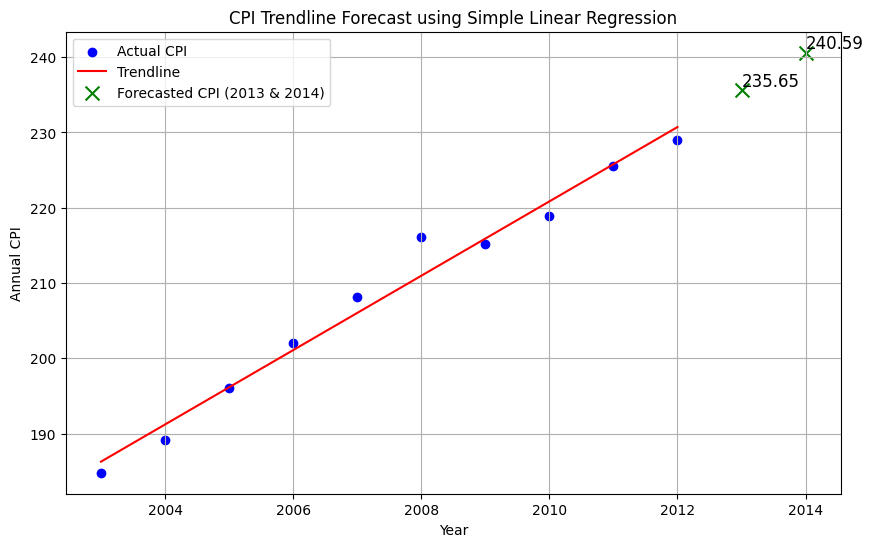

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from io import StringIO

# The data string as provided
data_string = """
Index	Year	Annual_CPI
0	2003	184.8
1	2004	189.1
2	2005	196.1
3	2006	202
4	2007	208.143
5	2008	216.116
6	2009	215.183
7	2010	218.901
8	2011	225.537
9	2012	229.039
"""

# Parsing the data into a DataFrame
df = pd.read_csv(StringIO(data_string), sep=r'\s+', engine='python')

# Extracting the features (Year) and target variable (Annual CPI)
X = df[['Year']].values  # Feature variable
y = df['Annual_CPI'].values  # Target variable

# Creating and fitting the simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Generating predictions for the current data
df['Predicted_CPI'] = model.predict(X)

# Forecasting for the next two years (2013 and 2014)
future_years = np.array([[2013], [2014]])
future_predictions = model.predict(future_years)

# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Annual_CPI'], color='blue', label='Actual CPI')
plt.plot(df['Year'], df['Predicted_CPI'], color='red', label='Trendline')
plt.scatter(future_years, future_predictions, color='green', marker='x', s=100, label='Forecasted CPI (2013 & 2014)')

# Adding annotations for future predictions
for i, year in enumerate([2013, 2014]):
    plt.text(year, future_predictions[i], f'{future_predictions[i]:.2f}', fontsize=12, verticalalignment='bottom')

# Setting labels and title
plt.xlabel('Year')
plt.ylabel('Annual CPI')
plt.title('CPI Trendline Forecast using Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()




In [49]:
# Adjusting the approach to calculate the level and trend based on the given requirement: using index year 0 for 2003.
# Using the linear regression coefficients correctly with the Year 2003 as the base year.

# Adjusting the Year column to start from 0
df['Year_Index'] = df['Year'] - 2003

# Re-fitting the linear regression model using the adjusted Year_Index
X_index = df[['Year_Index']].values
model.fit(X_index, y)

# The intercept (level) and slope (trend) of the model based on the adjusted index
level = model.intercept_
trend = model.coef_[0]

# Displaying the trend and level values, rounded to two decimal places
level_rounded = round(level, 2)
trend_rounded = round(trend, 2)

print(trend_rounded, level_rounded)


4.94 186.27


In [50]:
# Forecasting the CPI for the years 2013 and 2014 using the model fitted with Year_Index

# Creating the input for the years 2013 and 2014 with the adjusted Year_Index (where 2003 is 0)
future_years_index = np.array([[2013 - 2003], [2014 - 2003]])
future_predictions_index = model.predict(future_years_index)

# Rounding the forecasted values to two decimal places
forecast_2013 = round(future_predictions_index[0], 2)
forecast_2014 = round(future_predictions_index[1], 2)

print(forecast_2013, forecast_2014)


235.65 240.59


## QUESTION 7

In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from io import StringIO

try:
    # ---------------------------
    # Raw data string
    # ---------------------------
    data_string = """
    Month	Year	Temperature
Jan	1999	34.91
Feb	1999	37.52
Mar	1999	41.36
Apr	1999	53.04
May	1999	62.83
Jun	1999	70.77
Jul	1999	78.52
Aug	1999	75.36
Sep	1999	67.02
Oct	1999	53.06
Nov	1999	50.07
Dec	1999	38.16
Jan	2000	32.67
Feb	2000	36.79
Mar	2000	48.19
Apr	2000	53.59
May	2000	64.81
Jun	2000	72.28
Jul	2000	72.08
Aug	2000	73.01
Sep	2000	65.23
Oct	2000	57.21
Nov	2000	42.94
Dec	2000	28.13
Jan	2001	32.3
Feb	2001	38.5
Mar	2001	36.2
Apr	2001	55.5
May	2001	60.8
Jun	2001	69.0
Jul	2001	72.2
Aug	2001	74.1
Sep	2001	65.3
    """
    # ---------------------------
    # Load into DataFrame
    # ---------------------------
    df_all = pd.read_csv(StringIO(data_string.strip()), sep=r'\t+')
    df_all.columns = ['Month', 'Year', 'Temperature']
    
    # Strip whitespace
    df_all['Month'] = df_all['Month'].str.strip()
    
    # Create YearNum
    df_all['YearNum'] = df_all['Year'] - 1998  # 1999 -> 1, etc.
    
    # Split train/test
    train = df_all[df_all['Year'].isin([1999, 2000])].copy().reset_index(drop=True)
    test = df_all[df_all['Year'] == 2001].copy().reset_index(drop=True)
    
    # ---------------------------
    # Create month dummies
    # ---------------------------
    month_dummies_train = pd.get_dummies(train['Month']).astype(float)
    if 'Dec' in month_dummies_train.columns:
        month_dummies_train = month_dummies_train.drop(columns=['Dec'])
    
    trainX = pd.concat([train[['YearNum']].astype(float), month_dummies_train], axis=1)
    trainX = sm.add_constant(trainX)
    trainy = train['Temperature'].astype(float)
    
    # ---------------------------
    # Backward elimination
    # ---------------------------
    alpha = 0.05
    def backward_elimination(X, y, alpha=0.05):
        X_be = X.copy()
        while True:
            model = sm.OLS(y, X_be).fit()
            pvals = model.pvalues.drop(labels=['const'], errors='ignore')
            if pvals.empty:
                break
            max_p = pvals.max()
            if max_p > alpha:
                worst_var = pvals.idxmax()
                X_be = X_be.drop(columns=[worst_var])
            else:
                break
        final_model = sm.OLS(y, X_be).fit()
        return final_model, X_be.columns.tolist()
    
    final_model, final_predictors = backward_elimination(trainX, trainy, alpha=alpha)
    
    # ---------------------------
    # Prepare test design matrix
    # ---------------------------
    month_dummies_test = pd.get_dummies(test['Month']).astype(float)
    if 'Dec' in month_dummies_test.columns:
        month_dummies_test = month_dummies_test.drop(columns=['Dec'])
    
    testX = pd.concat([test[['YearNum']].astype(float), month_dummies_test], axis=1)
    testX = sm.add_constant(testX)
    testX = testX.reindex(columns=final_predictors, fill_value=0.0)
    
    # Forecast and compute errors
    test['Forecast'] = final_model.predict(testX)
    test['Error'] = test['Temperature'] - test['Forecast']
    test['AbsError'] = test['Error'].abs()
    test['SquaredError'] = test['Error']**2
    test['APE'] = (test['AbsError'] / test['Temperature']) * 100
    
    MAD = test['AbsError'].mean()
    MSE = test['SquaredError'].mean()
    MAPE = test['APE'].mean()
    
    # ---------------------------
    # Print outputs
    # ---------------------------
    print("Final model predictors (after backward elimination):")
    print(final_predictors)
    print("\nModel coefficients (rounded to 2 decimals):")
    print(final_model.params.round(2).to_string())


    print("\n")
    # train on 1999 & 2000
    train = df_all[df_all['Year'].isin([1999, 2000])].reset_index(drop=True)
    test = df_all[df_all['Year'] == 2001].reset_index(drop=True)

    # dummies (use Dec as reference)
    month_dummies_train = pd.get_dummies(train['Month']).astype(float)
    if 'Dec' in month_dummies_train.columns:
        month_dummies_train = month_dummies_train.drop(columns=['Dec'])
    trainX = pd.concat([train[['YearNum']].astype(float), month_dummies_train], axis=1)
    trainX = sm.add_constant(trainX)
    trainy = train['Temperature'].astype(float)

    # backward elimination (alpha = 0.05)
    def backward_elimination(X, y, alpha=0.05):
        X_be = X.copy()
        while True:
            model = sm.OLS(y, X_be).fit()
            pvals = model.pvalues.drop(labels=['const'], errors='ignore')
            if pvals.empty:
                break
            max_p = pvals.max()
            if max_p > alpha:
                worst = pvals.idxmax()
                X_be = X_be.drop(columns=[worst])
            else:
                break
        return sm.OLS(y, X_be).fit(), X_be.columns.tolist()

    final_model, final_predictors = backward_elimination(trainX, trainy, alpha=0.05)

    # prepare test X (make sure columns numeric)
    month_dummies_test = pd.get_dummies(test['Month']).astype(float)
    if 'Dec' in month_dummies_test.columns:
        month_dummies_test = month_dummies_test.drop(columns=['Dec'])
    testX = pd.concat([test[['YearNum']].astype(float), month_dummies_test], axis=1)
    testX = sm.add_constant(testX)

    # reindex to model predictors, fill missing with 0.0
    testX = testX.reindex(columns=final_predictors, fill_value=0.0)

    # ensure intercept column is 1.0 so the constant is applied
    if 'const' in testX.columns:
        testX['const'] = 1.0

    # predict using model columns in same order as fitted model
    test['Forecast'] = final_model.predict(testX[final_model.params.index])

    # compute MAD
    test['AbsError'] = (test['Temperature'] - test['Forecast']).abs()
    MAD = test['AbsError'].mean()

    # print forecasts and MAD
    print(test[['Month','Forecast']].round(2).to_string(index=False))
    print("\nMAD = {:.2f}".format(MAD))


except Exception as e:
    print("An error occurred:", str(e))

    
    
except Exception as e:
    print("An error occurred:", str(e))





    

Final model predictors (after backward elimination):
['const', 'Apr', 'Aug', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

Model coefficients (rounded to 2 decimals):
const   34.70
Apr     18.62
Aug     39.49
Jul     40.60
Jun     36.83
Mar     10.08
May     29.12
Nov     11.81
Oct     20.44
Sep     31.43


Month  Forecast
  Jan     34.70
  Feb     34.70
  Mar     44.78
  Apr     53.31
  May     63.82
  Jun     71.53
  Jul     75.30
  Aug     74.18
  Sep     66.12

MAD = 2.95


Question 8

In [69]:
import numpy as np
import pandas as pd
from io import StringIO

# ---------------------------
# Data (exactly as provided)
# ---------------------------
data = """
Month\tPeriod\tGas Usage
Jan\t1\t241
Feb\t2\t231
Mar\t3\t154
Apr\t4\t143
May\t5\t57
Jun\t6\t32
Jul\t7\t26
Aug\t8\t31
Sep\t9\t26
Oct\t10\t44
Nov\t11\t85
Dec\t12\t197
Jan\t13\t228
Feb\t14\t241
Mar\t15\t244
Apr\t16\t135
May\t17\t34
Jun\t18\t36
Jul\t19\t24
Aug\t20\t26
Sep\t21\t27
Oct\t22\t40
Nov\t23\t84
Dec\t24\t188
"""

df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
y = df['Gas Usage'].astype(float).to_numpy()   # 0-based index: y[0] = period1, ..., y[23] = period24
m = 12  # seasonal period

# ---------------------------
# Holt-Winters additive (no trend) implementation
# ---------------------------
def holt_winters_additive_no_trend(y, m, alpha, gamma, n_forecast):
    """
    y: 1-D numpy array of historical observations (length N)
    m: seasonal period (12)
    alpha: level smoothing parameter (0-1)
    gamma: seasonal smoothing parameter (0-1)
    n_forecast: number of future periods to forecast (e.g., up to 26 -> n_forecast = 26 - N)
    Returns:
      forecasts_all: array of length N + n_forecast with one-step forecasts for t>=m and
                     multi-step forecasts for future periods
      level_history: list of level values (after update at each t)
      seasonal: final seasonal index array length m (for seasonal positions)
    Notes:
      - One-step-ahead forecasts for period t (t>=m) are L_{t-1} + S_{t-m}'s position.
      - Initialization: L0 = average of first season; S_i = y_i - L0 for i=0..m-1
    """
    N = len(y)
    # initialize
    L = np.mean(y[:m])                          # initial level
    S = np.array([y[i] - L for i in range(m)])  # initial seasonal indices (positions 0..m-1)
    forecasts = np.full(N + n_forecast, np.nan)
    level_history = [L]

    # generate one-step-ahead forecasts for t = m..N-1 (periods m+1 .. N)
    for t in range(m, N):
        # one-step forecast for period t (0-based index t) equals L_prev + seasonal for that position
        season_pos = t % m
        f = L + S[season_pos]
        forecasts[t] = f

        # update level and seasonal using observed y[t]
        y_t = y[t]
        L_new = alpha * (y_t - S[season_pos]) + (1 - alpha) * L
        S_new = gamma * (y_t - L_new) + (1 - gamma) * S[season_pos]

        # commit updates
        L = L_new
        S[season_pos] = S_new
        level_history.append(L)

    # after processing all available observations, produce h-step forecasts for future periods
    last_L = L
    # use current S array for seasonal positions; for future period p (0-based) seasonal index is S[p % m]
    for h in range(1, n_forecast + 1):
        p = N + (h - 1)    # 0-based index for period N+h
        season_pos = p % m
        forecasts[N + h - 1] = last_L + S[season_pos]

    return forecasts, level_history, S

# ---------------------------
# Part 1: use alpha=0.3, gamma=0.8, forecast periods 13-26
# ---------------------------
alpha = 0.3
gamma = 0.8
N = len(y)            # 24
n_forecast = 26 - N   # forecast up to period 26 -> 2 future points
forecasts_all, levels, final_seasonal = holt_winters_additive_no_trend(y, m, alpha, gamma, n_forecast)

# Extract forecasts for requested ranges (periods are 1-based; our arrays are 0-based)
def get_forecast_for_period(period):
    idx = period - 1
    return forecasts_all[idx]

# Forecasts for periods 13-18 (periods 13..18 correspond to indices 12..17)
print("Forecasts (alpha=0.30, gamma=0.80)\n")
for period in range(13, 19):
    print(f"Period {period:2d} forecast: {get_forecast_for_period(period):.2f}")

print("\nForecasts for periods 19-24:")
for period in range(19, 25):
    print(f"Period {period:2d} forecast: {get_forecast_for_period(period):.2f}")

print("\nForecasts for periods 25-26 (out-of-sample):")
for period in [25, 26]:
    print(f"Period {period:2d} forecast: {get_forecast_for_period(period):.2f}")

# ---------------------------
# Compute MAD for periods 13-24 (compare forecasts against actual y[12:24])
# ---------------------------
actual_13_24 = y[12:24]                    # periods 13..24
forecast_13_24 = forecasts_all[12:24]
abs_errors = np.abs(actual_13_24 - forecast_13_24)
MAD_13_24 = abs_errors.mean()
print(f"\nMAD for periods 13-24 (alpha={alpha}, gamma={gamma}): {MAD_13_24:.2f}")

# ---------------------------
# Grid search for best (alpha,gamma) to minimize MAD on periods 13-24
# (search granularity can be adjusted; here we use 0.05 step)
# ---------------------------
# α and γ from 0.1 to 1.0 inclusive, step = 0.1
alphas = np.arange(0.1, 1.01, 0.1)
gammas = np.arange(0.1, 1.01, 0.1)

best = {'alpha': None, 'gamma': None, 'MAD': np.inf}
for a in alphas:
    for g in gammas:
        f_all, _, _ = holt_winters_additive_no_trend(y, m, a, g, n_forecast=2)
        f_13_24 = f_all[12:24]
        mad = np.mean(np.abs(y[12:24] - f_13_24))
        if mad < best['MAD']:
            best = {'alpha': a, 'gamma': g, 'MAD': mad}

print("\nBest alpha/gamma (grid search step=0.05) minimizing MAD on periods 13-24:")
print(f"alpha = {best['alpha']:.2f}, gamma = {best['gamma']:.2f}, MAD = {best['MAD']:.2f}")

# ---------------------------
# If you want more precise search around the best pair, do a refined grid:
# ---------------------------
a0, g0 = best['alpha'], best['gamma']
alphas_refined = np.arange(max(0.01, a0-0.05), min(0.99, a0+0.051), 0.01)
gammas_refined = np.arange(max(0.01, g0-0.05), min(0.99, g0+0.051), 0.01)
best_ref = {'alpha': None, 'gamma': None, 'MAD': np.inf}
for a in alphas_refined:
    for g in gammas_refined:
        f_all, _, _ = holt_winters_additive_no_trend(y, m, a, g, n_forecast=2)
        mad = np.mean(np.abs(y[12:24] - f_all[12:24]))
        if mad < best_ref['MAD']:
            best_ref = {'alpha': a, 'gamma': g, 'MAD': mad}

print("\nRefined best (step=0.01) around initial best:")
print(f"alpha = {best_ref['alpha']:.2f}, gamma = {best_ref['gamma']:.2f}, MAD = {best_ref['MAD']:.2f}")


Forecasts (alpha=0.30, gamma=0.80)

Period 13 forecast: 241.00
Period 14 forecast: 227.10
Period 15 forecast: 154.27
Period 16 forecast: 170.19
Period 17 forecast: 73.63
Period 18 forecast: 36.74

Forecasts for periods 19-24:
Period 19 forecast: 30.52
Period 20 forecast: 33.56
Period 21 forecast: 26.29
Period 22 forecast: 44.51
Period 23 forecast: 84.15
Period 24 forecast: 196.11

Forecasts for periods 25-26 (out-of-sample):
Period 25 forecast: 230.40
Period 26 forecast: 235.46

MAD for periods 13-24 (alpha=0.3, gamma=0.8): 18.31

Best alpha/gamma (grid search step=0.05) minimizing MAD on periods 13-24:
alpha = 0.10, gamma = 0.10, MAD = 16.49

Refined best (step=0.01) around initial best:
alpha = 0.05, gamma = 0.05, MAD = 15.51


# QUESTION 9

In [87]:
import pandas as pd
import numpy as np
from io import StringIO
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

data = """Date	Rate
1/7/2005	5.21
1/14/2005	5.19
1/21/2005	5.15
1/28/2005	5.14
2/4/2005	5.14
2/11/2005	5.10
2/18/2005	5.14
2/25/2005	5.22
3/4/2005	5.33
3/11/2005	5.38
3/18/2005	5.47
3/25/2005	5.56
4/1/2005	5.58
4/8/2005	5.48
4/15/2005	5.46
4/22/2005	5.36
4/29/2005	5.33
5/6/2005	5.31
5/13/2005	5.33
5/20/2005	5.27
5/27/2005	5.21
6/3/2005	5.20
6/10/2005	5.14
6/17/2005	5.22
6/24/2005	5.16
7/1/2005	5.12
7/8/2005	5.20
7/15/2005	5.25
7/22/2005	5.32
7/29/2005	5.34
7/1/2005	5.12
7/8/2005	5.20
7/15/2005	5.25
7/22/2005	5.32
7/29/2005	5.34
8/5/2005	5.38
8/12/2005	5.47
8/19/2005	5.40
8/26/2005	5.35
9/2/2005	5.32
9/9/2005	5.30
9/16/2005	5.32
9/23/2005	5.37
9/30/2005	5.48
10/7/2005	5.54
10/14/2005	5.62
10/21/2005	5.65
10/28/2005	5.69
11/4/2005	5.85
11/11/2005	5.89
11/18/2005	5.90
11/25/2005	5.81
12/2/2005	5.81
12/9/2005	5.87
12/16/2005	5.85
12/23/2005	5.79
12/30/2005	5.76
1/6/2006	5.76
1/13/2006	5.71
1/20/2006	5.67
1/27/2006	5.70
2/3/2006	5.81
2/10/2006	5.83
2/17/2006	5.91
2/24/2006	5.89
3/3/2006	5.89
3/10/2006	6.00
3/17/2006	5.98
3/24/2006	5.97
3/31/2006	6.00
4/7/2006	6.10
4/14/2006	6.14
4/21/2006	6.17
4/28/2006	6.21
5/5/2006	6.22
5/12/2006	6.17
5/19/2006	6.20
5/26/2006	6.23
6/2/2006	6.26
6/9/2006	6.23
6/16/2006	6.25
6/23/2006	6.36
6/30/2006	6.43
7/7/2006	6.44
7/14/2006	6.37
7/21/2006	6.41
7/28/2006	6.34
8/4/2006	6.27
8/11/2006	6.20
8/18/2006	6.20
8/25/2006	6.18
9/1/2006	6.14
9/8/2006	6.16
9/15/2006	6.11
9/22/2006	6.06
9/29/2006	5.98
10/6/2006	5.98
10/13/2006	6.06
10/20/2006	6.06
10/27/2006	6.10
11/3/2006	6.02
11/10/2006	6.04
11/17/2006	5.94
11/24/2006	5.91
12/1/2006	5.87
12/8/2006	5.84
12/15/2006	5.86
12/22/2006	5.89
12/29/2006	5.93
1/5/2007	5.94
1/12/2007	5.96
1/19/2007	5.98
1/26/2007	5.98
2/2/2007	6.06
2/9/2007	6.02
2/16/2007	6.03
2/23/2007	5.97
3/2/2007	5.92
3/9/2007	5.86
3/16/2007	5.88
3/23/2007	5.90
3/30/2007	5.86
4/6/2007	5.87
4/13/2007	5.90
4/20/2007	5.89
4/27/2007	5.87
5/4/2007	5.87
5/11/2007	5.87
5/18/2007	5.92
5/25/2007	6.06
6/1/2007	6.12
6/8/2007	6.22
6/15/2007	6.43
6/22/2007	6.37
6/29/2007	6.34
7/6/2007	6.30
7/13/2007	6.39
7/20/2007	6.38
7/27/2007	6.37
8/3/2007	6.32
8/10/2007	6.25
8/17/2007	6.30
8/24/2007	6.18
8/31/2007	6.12
9/7/2007	6.15
9/14/2007	5.97
9/21/2007	5.98
9/28/2007	6.09
10/5/2007	6.03
10/12/2007	6.06
10/19/2007	6.08
10/26/2007	5.99
11/2/2007	5.91
11/9/2007	5.90
11/16/2007	5.88
11/23/2007	5.83
11/30/2007	5.73
12/7/2007	5.65
12/14/2007	5.78
12/21/2007	5.79
12/28/2007	5.79
1/4/2008	5.68
1/11/2008	5.43
1/18/2008	5.21
1/25/2008	4.95
2/1/2008	5.17
2/8/2008	5.15
2/15/2008	5.25
2/22/2008	5.64
2/29/2008	5.72
3/7/2008	5.47
3/14/2008	5.60
3/21/2008	5.27
3/28/2008	5.34
4/4/2008	5.42
4/11/2008	5.42
4/18/2008	5.40
4/25/2008	5.62
5/2/2008	5.59
5/9/2008	5.60
5/16/2008	5.60
5/23/2008	5.55
5/30/2008	5.66
6/6/2008	5.65
6/13/2008	5.93
6/20/2008	6.02
6/27/2008	6.04
7/4/2008	5.92
7/11/2008	5.91
7/18/2008	5.78
7/25/2008	6.18
8/1/2008	6.07
8/8/2008	6.10
8/15/2008	6.07
8/22/2008	6.00
8/29/2008	5.93
9/5/2008	5.90
9/12/2008	5.54
9/19/2008	5.35
9/26/2008	5.77
10/3/2008	5.78
10/10/2008	5.63
10/17/2008	6.14
10/24/2008	5.72
10/31/2008	6.19
11/7/2008	5.88
11/14/2008	5.81
11/21/2008	5.73
11/28/2008	5.74
12/5/2008	5.33
12/12/2008	5.20
12/19/2008	4.92
12/26/2008	4.91
1/9/2009	4.62
1/16/2009	4.65
1/23/2009	4.80
1/30/2009	4.80
2/6/2009	4.92
2/13/2009	4.81
2/20/2009	4.68
2/27/2009	4.68
3/6/2009	4.72
3/13/2009	4.64
3/20/2009	4.61
3/27/2009	4.58
4/3/2009	4.52
4/10/2009	4.54
4/17/2009	4.48
4/24/2009	4.48
5/1/2009	4.48
5/8/2009	4.51
5/15/2009	4.52
5/22/2009	4.50
5/29/2009	4.53
6/5/2009	4.79
6/12/2009	5.06
6/19/2009	4.89
6/26/2009	4.87
7/3/2009	4.77
7/10/2009	4.69
7/17/2009	4.63
7/24/2009	4.68
7/31/2009	4.69
8/7/2009	4.63
8/14/2009	4.68
8/21/2009	4.56
8/28/2009	4.58
9/4/2009	5.54
9/11/2009	4.50
9/18/2009	4.47
9/25/2009	4.46
10/2/2009	4.36
10/9/2009	4.33
10/16/2009	4.37
10/23/2009	4.43
10/30/2009	4.46
11/6/2009	4.40
11/13/2009	4.36
11/20/2009	4.32
11/27/2009	4.29
12/4/2009	4.27
12/11/2009	4.32
12/18/2009	4.38
12/25/2009	4.45
1/1/2010	4.54
1/8/2010	4.50
1/15/2010	4.45
1/22/2010	4.40
1/29/2010	4.39
2/5/2010	4.40
2/12/2010	4.34
2/19/2010	4.33
2/26/2010	4.40
3/5/2010	4.33
3/12/2010	4.32
3/19/2010	4.33
3/26/2010	4.34
4/2/2010	4.39
4/9/2010	4.52
4/16/2010	4.40
4/23/2010	4.39
4/30/2010	4.39
5/7/2010	4.36
5/14/2010	4.30
5/21/2010	4.24
5/28/2010	4.21
6/4/2010	4.20
6/11/2010	4.17
6/18/2010	4.20
6/25/2010	4.13"""  # keep your same data string here

# parse
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date').reset_index(drop=True)

# drop duplicate dates (keep first entry)
df = df.drop_duplicates(subset='Date', keep='first').reset_index(drop=True)

df.set_index('Date', inplace=True)
last_date = df.index[-1]

# Parameters (same as yours)
alpha = 0.7
beta  = 0.4
# gamma unused because we remove seasonality
# k = 52

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- CHANGE: remove seasonal component (trend-only Holt's method) ---
model = ExponentialSmoothing(df['Rate'].astype(float),
                             trend='add',
                             seasonal=None,                 # <-- no seasonality
                             initialization_method='estimated')

# use smoothing_trend instead of deprecated smoothing_slope
fitted = model.fit(smoothing_level=alpha,
                   smoothing_trend=beta,
                   optimized=False)

# target date
target_date = pd.to_datetime("2010-08-27")

delta_days = (target_date - last_date).days
steps_ahead = int(np.round(delta_days / 7.0))
if steps_ahead <= 0:
    raise ValueError("Target date must be after last observation")

fc = fitted.forecast(steps_ahead)
fc_value = float(fc.iloc[-1])

print("Part [A] Double exponential smoothing")

print(f"Last observed date: {last_date.date()}")
print(f"Target date: {target_date.date()}")
print(f"Weeks ahead (steps): {steps_ahead}")
print(f"Forecast for {target_date.date()} = {fc_value:.2f}")


Part [A] Double exponential smoothing
Last observed date: 2010-06-25
Target date: 2010-08-27
Weeks ahead (steps): 9
Forecast for 2010-08-27 = 3.94


QUESTION 10

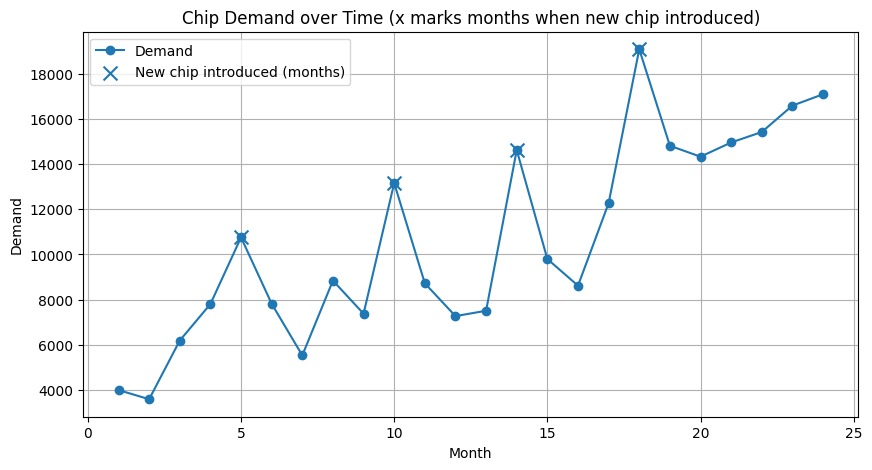

As new chips are​ introduced, the demand spikes.

Part [B] Causal regression model


Regression Equation:
Demand = 3141.598 + (536.407)*Month + (4956.617)*NewChip
If a new chip IS introduced (Month 25, NewChip=1): Forecast = 21508
If a new chip is NOT introduced (Month 25, NewChip=0): Forecast = 16552

95% CI when NewChip=1: [19532, 23485]
95% CI when NewChip=0: [15220, 17883]

Direct-calculation from coefficients (for transparency):
  Demand = 3141.598 + (536.407)*Month + (4956.617)*NewChip
  => With NewChip=1: 21508
  => With NewChip=0: 16552


In [86]:
# causal_forecast_chip_demand.py
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- data ---
data = """
Month	New Chip Introduced	Demand
1	0	4004
2	0	3599
3	0	6193
4	0	7807
5	1	10755
6	0	7821
7	0	5537
8	0	8844
9	0	7381
10	1	13158
11	0	8724
12	0	7274
13	0	7511
14	1	14616
15	0	9799
16	0	8619
17	0	12269
18	1	19075
19	0	14806
20	0	14324
21	0	14951
22	0	15414
23	0	16582
24	0	17084
"""

# --- read and prepare ---
df = pd.read_csv(StringIO(data.strip()), sep=r'\t+')
df['Month'] = df['Month'].astype(int)
df['NewChip'] = df['New Chip Introduced'].astype(int)
df = df[['Month','NewChip','Demand']].copy()

# ---- a) Chart of the data ----
plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Demand'], marker='o', label='Demand')
# mark months with new chip
introduced = df[df['NewChip'] == 1]
plt.scatter(introduced['Month'], introduced['Demand'], marker='x', s=100, label='New chip introduced (months)')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Chip Demand over Time (x marks months when new chip introduced)')
plt.legend()
plt.grid(True)
plt.show()

print("As new chips are​ introduced, the demand spikes.")


# ---- b) Causal regression model: Demand ~ Month + NewChip ----
print("\nPart [B] Causal regression model\n")

# ---- b) Causal regression model: Demand ~ Month + NewChip ----
X = df[['Month', 'NewChip']]
X = sm.add_constant(X)  # adds intercept
y = df['Demand']

model = sm.OLS(y, X).fit()
# print(model.summary())

# Extract coefficients
b0 = model.params['const']
b1 = model.params['Month']
b2 = model.params['NewChip']

print("\nRegression Equation:")
print(f"Demand = {b0:.3f} + ({b1:.3f})*Month + ({b2:.3f})*NewChip")


# ---- c) Forecast for Month 25 (with and without new chip) ----
# ---- fixed prediction block ----

next_month = 25

# get the exact exog names/order used by the fitted model
exog_names = model.model.exog_names  # e.g. ['const','Month','NewChip']

# build exog rows that exactly match the model columns (order + names)
exog_with = pd.DataFrame([[1, next_month, 1]], columns=exog_names)    # NewChip = 1
exog_without = pd.DataFrame([[1, next_month, 0]], columns=exog_names) # NewChip = 0

# now predictions will not raise shape mismatch errors
pred_with = model.get_prediction(exog_with).summary_frame(alpha=0.05).iloc[0]
pred_without = model.get_prediction(exog_without).summary_frame(alpha=0.05).iloc[0]

forecast_with = int(round(pred_with['mean']))
forecast_without = int(round(pred_without['mean']))

print(f"If a new chip IS introduced (Month {next_month}, NewChip=1): Forecast = {forecast_with}")
print(f"If a new chip is NOT introduced (Month {next_month}, NewChip=0): Forecast = {forecast_without}")

print()
print("95% CI when NewChip=1: [{:.0f}, {:.0f}]".format(pred_with['mean_ci_lower'], pred_with['mean_ci_upper']))
print("95% CI when NewChip=0: [{:.0f}, {:.0f}]".format(pred_without['mean_ci_lower'], pred_without['mean_ci_upper']))

# optional direct calculation from coefficients (sanity check)
b0 = model.params['const']
b1 = model.params['Month']
b2 = model.params['NewChip']

direct_with = b0 + b1*next_month + b2*1
direct_without = b0 + b1*next_month + b2*0

print()
print("Direct-calculation from coefficients (for transparency):")
print(f"  Demand = {b0:.3f} + ({b1:.3f})*Month + ({b2:.3f})*NewChip")
print(f"  => With NewChip=1: {direct_with:.0f}")
print(f"  => With NewChip=0: {direct_without:.0f}")
